<a href="https://colab.research.google.com/github/Aishee23/OasisInfobyte/blob/main/iris_classificntn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Dataset Visualization


In [2]:
iris = pd.read_csv("Iris.csv")
print(iris.head(10)) #printing first 10 rows


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [4]:
print(iris.describe()) # print descriptively

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


Number of Rows or columns

In [3]:
iris.shape

(150, 6)

In [5]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
print("Target Labels", iris["Species"].unique()) # print different species

Target Labels ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Corelation

In [7]:
corr=iris.corr()
corr

<ipython-input-7-4f2e63e399ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=iris.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


Heat map

<ipython-input-8-7cc2851e7f28>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot = True, cmap = "Oranges_r")


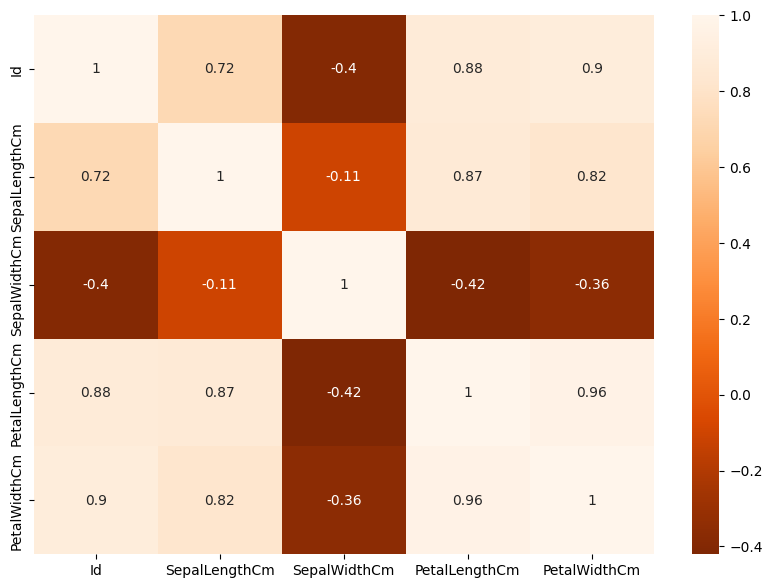

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(iris.corr(), annot = True, cmap = "Oranges_r")
plt.show()

Line chart

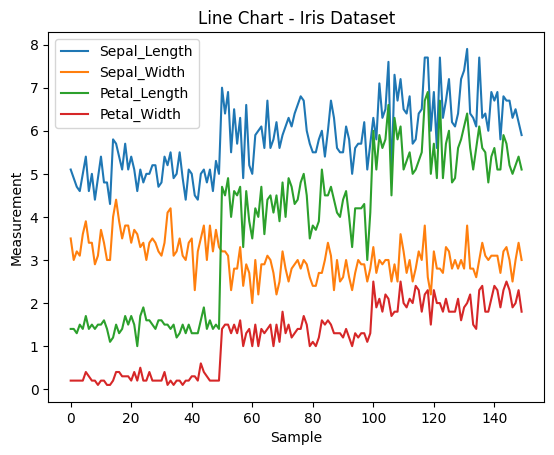

In [9]:
# Creating line chart
plt.plot(iris['SepalLengthCm'], label='Sepal_Length')
plt.plot(iris['SepalWidthCm'], label='Sepal_Width')
plt.plot(iris['PetalLengthCm'], label='Petal_Length')
plt.plot(iris['PetalWidthCm'], label='Petal_Width')

# Adding labels and titles
plt.xlabel('Sample')
plt.ylabel('Measurement')
plt.title('Line Chart - Iris Dataset')

# Adding Legend
plt.legend()

# Displaying the line chart
plt.show()

Box Plot

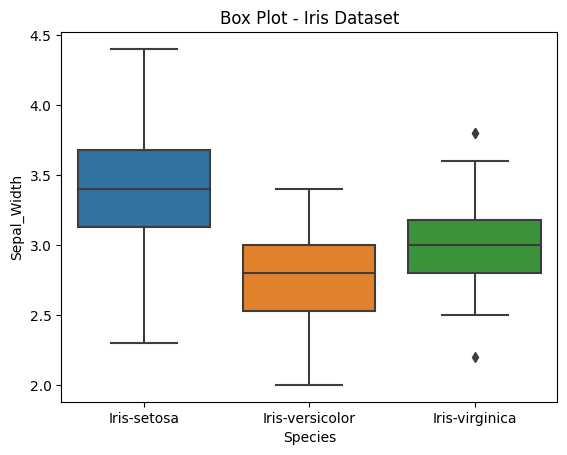

In [10]:

# Creating a Box_Plot
sns.boxplot(x='Species', y='SepalWidthCm', data=iris)

# Adding labels and title
plt.xlabel('Species')
plt.ylabel('Sepal_Width')
plt.title('Box Plot - Iris Dataset')

# Displaying the Box_Plot
plt.show()

Strip Plot

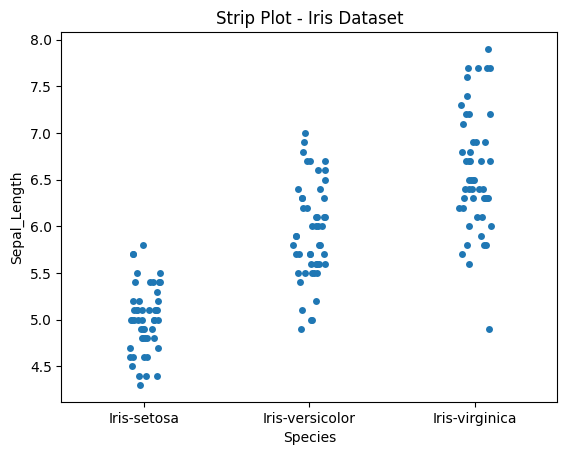

In [11]:
# Creating strip plot
sns.stripplot(x='Species', y='SepalLengthCm',data=iris)

# Adding labels and title
plt.xlabel('Species')
plt.ylabel('Sepal_Length')
plt.title('Strip Plot - Iris Dataset')

# Displaying the Strip Plot
plt.show()

Joint Plot

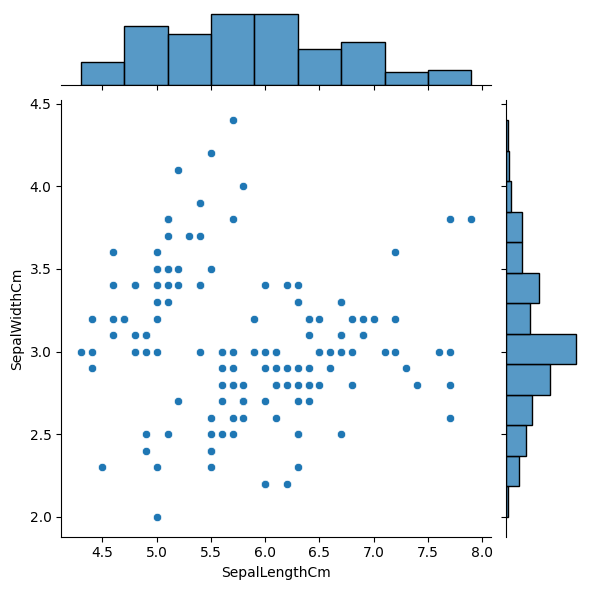

In [12]:

# Creating a Joint_Plot
sns.jointplot(data=iris, x='SepalLengthCm', y='SepalWidthCm')


# Displaying the Joint_Plot
plt.show()

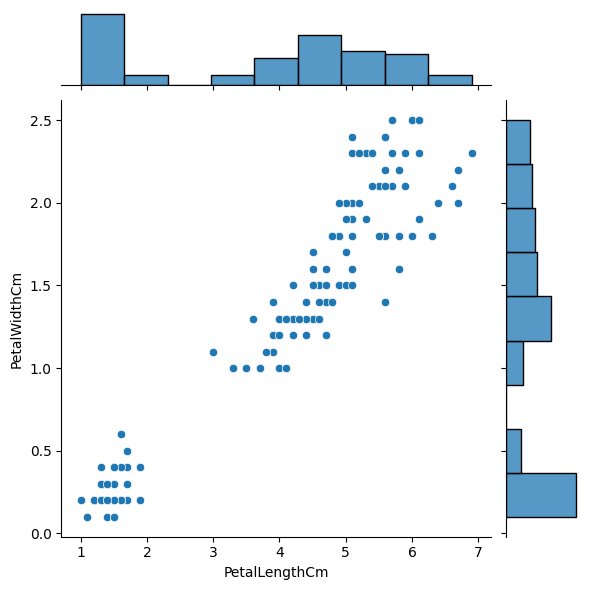

In [13]:

# Creating a Joint_Plot
sns.jointplot(data=iris, x='PetalLengthCm', y='PetalWidthCm')


# Displaying the Joint_Plot
plt.show()

In [15]:
import plotly.express as px
fig = px.scatter(iris, x="SepalLengthCm", y="SepalWidthCm", color="Species")

In [16]:
fig.show()

In [44]:
iris = iris.iloc[: , 1:]
x = iris.drop("Species", axis=1)
y = iris["Species"]

# Model

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.neighbors import KNeighborsClassifier


In [20]:
k1=5
knn=KNeighborsClassifier(k1)


In [21]:
knn

KNeighborsClassifier()

In [22]:

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [65]:
y_pred=knn.predict(x_test)

In [66]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
cm

Confusion Matrix :


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [67]:
acc = metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy Score :")
acc

Accuracy Score :


96.66666666666667

In [68]:
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Logistic Regression

In [69]:
lr = LogisticRegression()


In [70]:

lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [71]:
y1_pred = lr.predict(x_test)

In [72]:
cm = metrics.confusion_matrix(y_test, y1_pred)
print("Confusion Matrix :")
cm

Confusion Matrix :


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [73]:

acc = metrics.accuracy_score(y_test, y1_pred)*100
print("Accuracy Score :")
acc


Accuracy Score :


100.0

In [74]:
print("Classification Report :")
print(metrics.classification_report(y_test, y1_pred))

Classification Report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Random Forest

In [75]:
rf = RandomForestClassifier()

In [76]:

rf.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
Y2_Pred = rf.predict(x_test)

In [78]:
cm = metrics.confusion_matrix(y_test, Y2_Pred)
print("Confusion Matrix :")
cm

Confusion Matrix :


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [79]:
acc = metrics.accuracy_score(y_test, Y2_Pred)*100
print("Accuracy Score :")
acc

Accuracy Score :


100.0

In [80]:

print("Classification Report :")
print(metrics.classification_report(y_test, Y2_Pred))

Classification Report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Decision Tree

In [45]:
dtc = DecisionTreeClassifier()

In [47]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [48]:
y3_Pred = dtc.predict(x_test)

In [49]:
cm = metrics.confusion_matrix(y_test, y3_Pred)
print("Confusion Matrix :")
cm

Confusion Matrix :


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [50]:
acc = metrics.accuracy_score(y_test, y3_Pred)*100
print("Accuracy Score :")
acc


Accuracy Score :


100.0

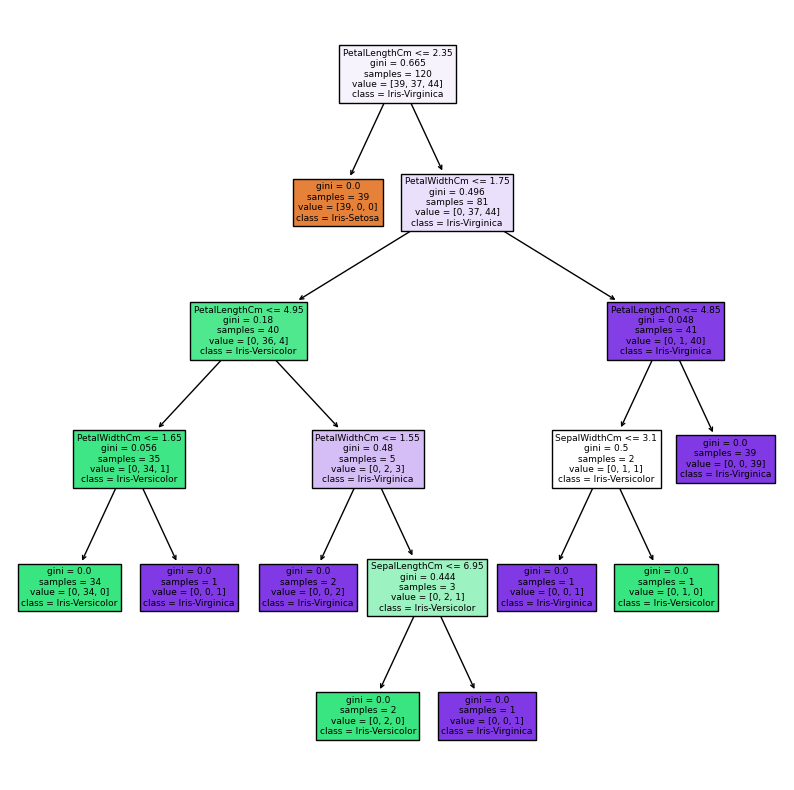

In [52]:
from sklearn.tree import plot_tree
feature = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
classes = ["Iris-Setosa", "Iris-Versicolor", "Iris-Virginica"]
plt.figure(figsize=(10,10))
plot_tree(dtc, feature_names = feature, class_names = classes, filled = True);

SVM Algo

In [53]:

svc = SVC()

In [55]:
svc.fit(x_train, y_train)

SVC()

In [56]:
y_PRed = svc.predict(x_test)

In [58]:
cm = metrics.confusion_matrix(y_test, y_PRed)
print("Confusion Matrix :")
cm

Confusion Matrix :


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

NAIVE BAYES CLASSIFIER

In [59]:
nb = GaussianNB()

In [60]:

nb.fit(x_train, y_train)

GaussianNB()

In [61]:

y_prEd = nb.predict(x_test)

In [62]:
cm = metrics.confusion_matrix(y_test, y_prEd)
print("Confusion Matrix :")
cm

Confusion Matrix :


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

In [63]:
cc = metrics.accuracy_score(y_test, y_prEd)*100
print("Accuracy Score :")
acc

Accuracy Score :


100.0

# User Input of Data

In [64]:
x_new = np.array([[2, 5.0, 5, 0.9]])
prediction = knn.predict(x_new)
print("The given set of values indicate it falls under: {}".format(prediction))

The given set of values indicate it falls under: ['Iris-versicolor']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

